<a href="https://colab.research.google.com/github/Therealchyke/EDA/blob/master/Whatsapp_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install emoji

     |████████████████████████████████| 170 kB 8.4 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=cba13d43dab7c2f91d7d8a07e3987ad10922c04fcf0399bb56dbf2380e8949b0
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji


In [2]:
import pandas as pd
import numpy as np
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
import emoji
import datetime as time
import matplotlib
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
from datetime import datetime, date
import time
import hashlib

In [3]:
whatsapp_df=pd.read_fwf('/content/drive/MyDrive/WhatsApp Chat with Netherrealm Kinikan.txt',header=None)

## I deleted the cell where I printed the head of the df because it contains phone numbers and I think that would be inappropriate not to. So assume I already did that LOL

In [4]:
whatsapp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14662 entries, 0 to 14661
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       14418 non-null  object
 1   1       333 non-null    object
dtypes: object(2)
memory usage: 229.2+ KB


In [5]:
def txtTodf(txt_file):
  '''Convert WhatsApp chat log text file to a Pandas dataframe.'''
    
  # some regex to account for messages taking up multiple lines
  pat=re.compile(r'^(\d\d\/\d\d\/\d\d\d\d.*?)(?=^^\d\d\/\d\d\/\d\d\d\d|\Z)', re.S | re.M)
  with open(txt_file) as file:
    data = [m.group(1).strip().replace('\n', ' ') for m in pat.finditer(file.read())]

  user     = []; 
  message  = []; 
  datetime = []

  for row in data:
    #timestamp is before the first dash
    datetime.append(row.split('-')[0])

    #sender is between am/pm dash or colon
    try:
      s=re.search('m - (.*?):', row).group(1)
      user.append(s)

    except:
      user.append('')

    #message is after the first colon
    try:
      message.append(row.split(': ', 1)[1])
    except:
      message.append('')

  df=pd.DataFrame(zip(datetime,user,message),columns=['datetime','user','message'])
  df['datetime'] = pd.to_datetime(df.datetime.str.strip(), format='%d/%m/%Y, %I:%M %p')


  #remove information not associated witht a message sender
  df=df[df.user!=''].reset_index(drop=True)

  #Anonymise phone numbers
  df['user']=df['user'].apply(lambda x:hashlib.sha256(x.encode()).hexdigest())

  return df
                       



In [6]:
whatsapp_df=txtTodf('/content/drive/MyDrive/WhatsApp Chat with Netherrealm Kinikan.txt')

In [7]:
whatsapp_df.head() 

,datetime,user,message
0,2021-09-05 18:00:00,203ee687f762ca0a1e30dedf434c55c1abba83752229c9...,Which location him dey? 👁️
1,2021-09-05 18:00:00,42c63eae5b7e9f7b33d58250f6282ca073b1ab1898a124...,Lagos
2,2021-09-05 18:00:00,42c63eae5b7e9f7b33d58250f6282ca073b1ab1898a124...,But im not sure which side exactly
3,2021-09-05 18:01:00,b61c603973e10151bf09abc115161cfe43031218a72495...,Festac 🤲🏾
4,2021-09-05 18:01:00,203ee687f762ca0a1e30dedf434c55c1abba83752229c9...,Lmao...dat one is not Lagos again na


In [8]:
#Understanding Image shape data
img = whatsapp_df[whatsapp_df['message'] == "<Media omitted>" ]
img.shape

(1982, 3)

In [9]:
#Dropping all image data
whatsapp_df.drop(img.index, inplace=True)

# **Question 1**: Who are the most active users?👁

In [10]:
df_copy=whatsapp_df.copy()

In [11]:
df_copy.groupby('user')['message'].count().sort_values(ascending=False).reset_index()

,user,message
0,ddb20fe70e155cf7ac1649baa4b0b8adff12ce317dbac4...,1834
1,d7500dcb3d1c2a7f47722820935be2039a3321fe55a13b...,1486
2,07fe2104d50046daf86bc95fd7320abaa3d54bae749a5b...,1037
3,6b66904c1a407cded6fd07cc853ee83afd38352a0c2af7...,960
4,1ccd72e8dd12f1f27761b59fa958b37deebbc82ae5a29a...,846
5,f3588de37ac465bcae190956b703314363709381753276...,720
6,fac2589cb95b07de73b0383d86549feffc7e21c89a54d2...,700
7,291ba00de236bfab983a611e1160a9ef9e7ceff93eefbf...,642
8,49de5155e0f9d5b2b88f4fe5908940753c479c9867fdd1...,630
9,e958d53c6b1bb16ee191acf5e82d6ef517680c5f89340d...,547


## **Question 2**:Most active hours?

In [17]:
df_copy['Hours']=df_copy['datetime'].apply(lambda x: x.hour)

In [22]:
time=df_copy.groupby('Hours').count().reset_index().sort_values(by='Hours')

In [23]:
time

,Hours,datetime,user,message
0,0,218,218,218
1,1,72,72,72
2,2,68,68,68
3,3,7,7,7
4,4,10,10,10
5,5,16,16,16
6,6,38,38,38
7,7,70,70,70
8,8,314,314,314
9,9,398,398,398


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


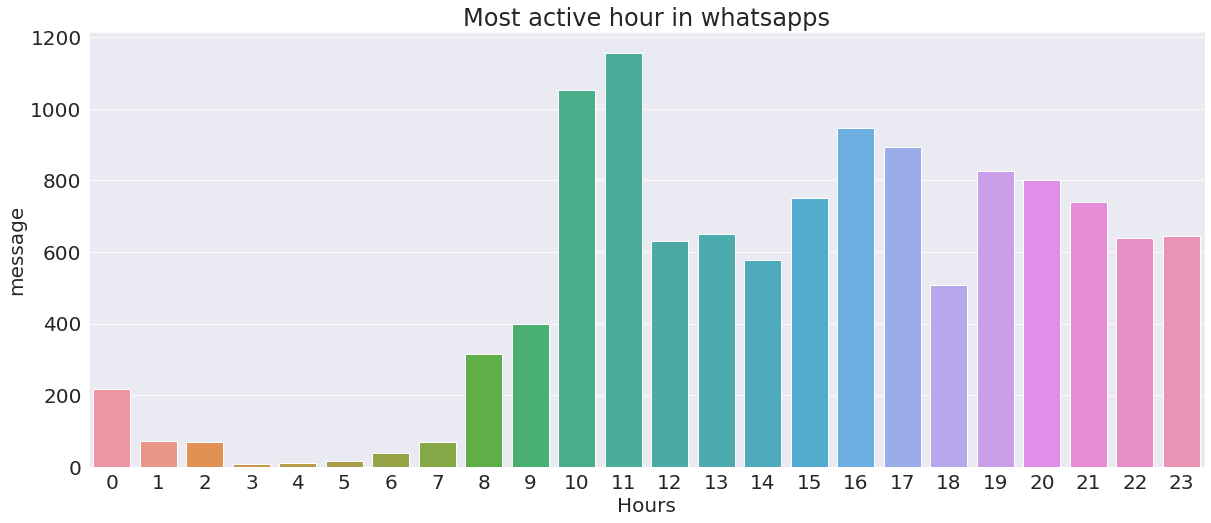

In [24]:
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (20, 8)

 
sns.set_style("darkgrid")

plt.title('Most active hour in whatsapps');
sns.barplot(time.Hours,time.message,data = time,dodge=False)

## **Question 3**: Most active day in the week

In [29]:
import calendar
df_copy['Day_of_Week']=df_copy['datetime'].apply(lambda x:calendar.day_name[x.weekday()])

In [30]:
df_copy

,datetime,user,message,Hours,Day_of_Week
0,2021-09-05 18:00:00,203ee687f762ca0a1e30dedf434c55c1abba83752229c9...,Which location him dey? 👁️,18,Sunday
1,2021-09-05 18:00:00,42c63eae5b7e9f7b33d58250f6282ca073b1ab1898a124...,Lagos,18,Sunday
2,2021-09-05 18:00:00,42c63eae5b7e9f7b33d58250f6282ca073b1ab1898a124...,But im not sure which side exactly,18,Sunday
3,2021-09-05 18:01:00,b61c603973e10151bf09abc115161cfe43031218a72495...,Festac 🤲🏾,18,Sunday
4,2021-09-05 18:01:00,203ee687f762ca0a1e30dedf434c55c1abba83752229c9...,Lmao...dat one is not Lagos again na,18,Sunday
...,...,...,...,...,...
13999,2021-10-29 17:50:00,07860f0778704f820e4b34323d74d6d8bf1cb7a7e07476...,Money no dey,17,Friday
14000,2021-10-29 18:50:00,e958d53c6b1bb16ee191acf5e82d6ef517680c5f89340d...,Wats going on here...i miss anytin?,18,Friday
14001,2021-10-29 18:51:00,291ba00de236bfab983a611e1160a9ef9e7ceff93eefbf...,"Yes, you now owe me 60$🌛",18,Friday
14004,2021-10-29 18:52:00,e958d53c6b1bb16ee191acf5e82d6ef517680c5f89340d...,Dat doesnt sound good..,18,Friday


In [31]:
day=df_copy.groupby('Day_of_Week').count().reset_index().sort_values(by='Day_of_Week')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


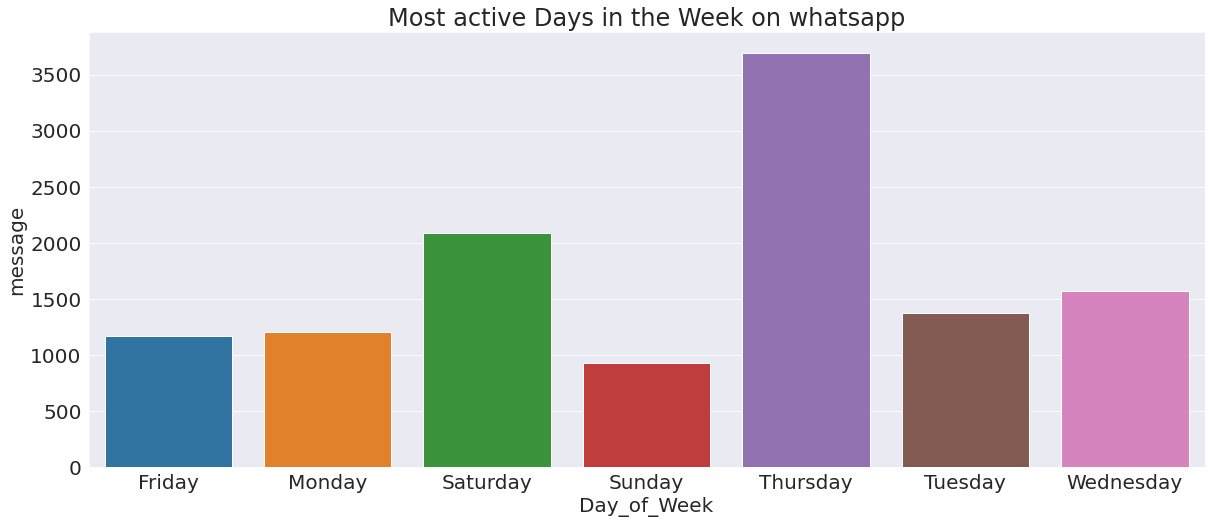

In [33]:
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (20, 8)

 
sns.set_style("darkgrid")

plt.title('Most active Days in the Week on whatsapp');
sns.barplot(day.Day_of_Week,day.message,data = day,dodge=False)

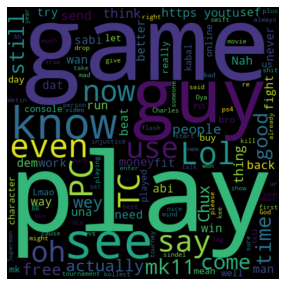

In [39]:
word = " ".join(review for review in df_copy.message)

stopwords = set(STOPWORDS)

#delete the word/text that are commonly used(eg.the,yes,no,bye,or and is)
stopwords.update(["the","is","yea","ok","okay","or","make","no","will","yeah","I","how","omo","don","you","done","want","Yes","far","dey","go","na","sha","on","sha","one"])

#Creating a word cloud 
wordcloud = WordCloud(width = 500, height =500 ,stopwords=stopwords, background_color="black",min_font_size = 10).generate(word)

plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

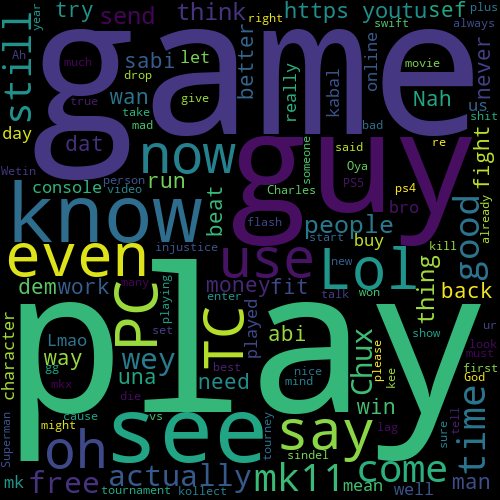

In [40]:
wordcloud.to_image()